In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
import plotly.express as px


In [45]:
# import csvs
season_1617 = pd.read_csv("cleaned_bball_data/2016_17_nbaavgs.csv")
season_1718 = pd.read_csv("cleaned_bball_data/2017_18_nbaavgs.csv")
season_1819 = pd.read_csv("cleaned_bball_data/2018_19_nbaavgs.csv")
season_1920 = pd.read_csv("cleaned_bball_data/2019_20_nbaavgs.csv")
season_2021 = pd.read_csv("cleaned_bball_data/2020_21_nbaavgs.csv")
season_1920.columns

Index(['ID', 'Player', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'BPM', 'VORP'],
      dtype='object')

In [46]:
def year_cleaning(df, year):
    df['year'] = year
    df['u_player'] = df['Player'] + " " + df['year']
    df = df.drop(['year'], axis = 1)
    return df

In [47]:
season_1617 = year_cleaning(season_1617,"2017")
season_1718 = year_cleaning(season_1718,"2018")
season_1819 = year_cleaning(season_1819,"2019")
season_1920 = year_cleaning(season_1920,"2020")
season_2021 = year_cleaning(season_2021,"2021")


In [48]:
# merge df's into one df

data_frames = [season_1617, season_1718, season_1819, season_1920, season_2021]

seasons_df_merged = pd.concat(data_frames)
seasons_df_merged = seasons_df_merged.set_index('ID')
seasons_df_merged.head()

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,AST,STL,BLK,TOV,PF,PTS,PER,BPM,VORP,u_player
ID,,,,,,,,,,,,,,,,,,,,,
1,Álex Abrines,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,...,0.6,0.5,0.1,0.5,1.7,6.0,10.1,-1.6,0.1,Álex Abrines 2017
2,Quincy Acy,38,1,14.7,1.8,4.5,0.412,1.0,2.4,0.411,...,0.5,0.4,0.4,0.6,1.8,5.8,11.8,-2.1,0.0,Quincy Acy 2017
3,Steven Adams,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,...,1.1,1.1,1.0,1.8,2.4,11.3,16.5,-0.2,1.1,Steven Adams 2017
4,Arron Afflalo,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,...,1.3,0.3,0.1,0.7,1.7,8.4,8.9,-3.6,-0.7,Arron Afflalo 2017
5,Alexis Ajinça,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,...,0.3,0.5,0.6,0.8,2.0,5.3,12.9,-3.3,-0.2,Alexis Ajinça 2017


In [49]:
# make "Player" its own df

player = [seasons_df_merged["u_player"]]
player_name = pd.concat(player, axis=1)
player_name.head()

,u_player
ID,
1,Álex Abrines 2017
2,Quincy Acy 2017
3,Steven Adams 2017
4,Arron Afflalo 2017
5,Alexis Ajinça 2017


In [50]:
# remove players from merged df
seasons_df_merged.drop(['Player','u_player'], inplace=True, axis=1)

seasons_df_merged.head()

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,BPM,VORP
ID,,,,,,,,,,,,,,,,,,,,,
1,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,...,1.3,0.6,0.5,0.1,0.5,1.7,6.0,10.1,-1.6,0.1
2,38,1,14.7,1.8,4.5,0.412,1.0,2.4,0.411,0.9,...,3.0,0.5,0.4,0.4,0.6,1.8,5.8,11.8,-2.1,0.0
3,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,...,7.7,1.1,1.1,1.0,1.8,2.4,11.3,16.5,-0.2,1.1
4,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,2.0,...,2.0,1.3,0.3,0.1,0.7,1.7,8.4,8.9,-3.6,-0.7
5,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,2.3,...,4.5,0.3,0.5,0.6,0.8,2.0,5.3,12.9,-3.3,-0.2


In [51]:
# scale the merged df

nba_scaled = StandardScaler().fit_transform(seasons_df_merged)
print(nba_scaled[0:5])


[[ 0.84057258 -0.61076908 -0.439592   -0.52437437 -0.42458376 -0.45091985
   0.62442807  0.5117518   0.60858312 -0.92894692 -0.90533306 -0.53476297
   0.2484454  -0.56296384 -0.65147414  0.90934124 -0.69435493 -0.94452773
  -0.92358072 -0.72956628 -0.29148103 -0.7232388  -0.73439543  0.01954654
  -0.41575204 -0.40671383 -0.01074125 -0.36293347]
 [-0.36939837 -0.79921158 -0.526396   -0.6141206  -0.53204171 -0.27835016
   0.14212009 -0.05147736  0.80955228 -0.76379008 -0.69875794 -0.63684952
   0.16118468 -0.11909718 -0.10859817  0.20266437 -0.42813398 -0.13212948
  -0.23017264 -0.78580542 -0.53461345  0.01566955 -0.61067653  0.14750085
  -0.44802806 -0.16552948 -0.08451357 -0.44506989]
 [ 1.32456097  2.17817999  1.12288002  0.68719967  0.26314712  1.16578569
  -1.06364987 -1.17793568 -1.94372526  1.32819653  1.10139675  0.61174745
   0.59748829  0.47272504  0.85651465 -0.4610389   3.56518015  0.78858853
   1.68689678 -0.44837057  1.16731346  1.49348625  0.87395036  0.91522667
   0.43956

In [52]:
# Initialize PCA model
pca = PCA(n_components=3)

In [53]:
# Get 3 principal components for the iris data.
nba_pca = pca.fit_transform(nba_scaled)

In [54]:
# create PCA df
df_nba_pca = pd.DataFrame(
    data = nba_pca, columns = ["principal component 1", "principal component 2", "principal component 3"], index=seasons_df_merged.index)
df_nba_pca.head()

,principal component 1,principal component 2,principal component 3
ID,,,
1,-1.990251,-1.111297,1.675962
2,-1.747374,-0.165166,0.647201
3,3.790687,3.616649,-2.826451
4,-0.626987,-1.072805,0.961489
5,-1.312353,2.132289,-1.431915


In [55]:
pca.explained_variance_ratio_

array([0.5089292 , 0.13199011, 0.09148876])

In [56]:
# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_nba_pca)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [57]:
# Initialize the K-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(df_nba_pca)

# Predict clusters
predictions = model.predict(df_nba_pca)

# Add the predicted class columns
player_name["class"] = model.labels_
player_name.head()


,u_player,class
ID,,
1,Álex Abrines 2017,4
2,Quincy Acy 2017,4
3,Steven Adams 2017,0
4,Arron Afflalo 2017,4
5,Alexis Ajinça 2017,4


In [58]:
# Player Search Bar

player_search = player_name[player_name["u_player"] == "Quincy Acy 2017"]
player_search

,u_player,class
ID,,
2,Quincy Acy 2017,4


In [59]:
#sort by class

sorted_class = player_name.sort_values(["class"])
class_one = sorted_class[(sorted_class["class"] == 0)]
class_two = sorted_class[(sorted_class["class"] == 1)]
class_three = sorted_class[(sorted_class["class"] == 2)]
class_four = sorted_class[(sorted_class["class"] == 3)]
class_five = sorted_class[(sorted_class["class"] == 4)]
# class 1 df

df_one = pd.concat([class_one, seasons_df_merged], axis=1)
class_one_df = df_one.dropna()
#class_one_df.tail()
#center_avg_vorp = class_one_df.mean()["BPM"]
#print(center_avg_vorp)

# class 2 df

df_two = pd.concat([class_two, seasons_df_merged], axis=1)
class_two_df = df_two.dropna()


# class 3 df

df_three = pd.concat([class_three, seasons_df_merged], axis=1)
class_three_df = df_three.dropna()

# class 4 df

df_four = pd.concat([class_four, seasons_df_merged], axis=1)
class_four_df = df_four.dropna()

# class 5 df

df_five = pd.concat([class_five, seasons_df_merged], axis=1)
class_five_df = df_five.dropna()

## ML Process

In [60]:
def get_clusters(k, data):
    '''A Function to Clusters out of a 3 Column Df'''
    # Create a copy of the DataFrame
    data = data.copy()

    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [61]:
# So here I am creating a more specific model. 
off_player = season_1920[["3P%","FG","MP"]]

In [62]:
# Now I'm running that model through the 
five_clusters = get_clusters(5, off_player)
four_clusters = get_clusters(4, off_player)
three_clusters = get_clusters(3, off_player)
three_clusters

,3P%,FG,MP,class
0,0.333,4.5,26.7,2
1,0.143,6.1,33.6,2
2,0.389,7.4,33.1,2
3,0.000,0.5,6.5,1
4,0.346,2.1,12.6,1
...,...,...,...,...
524,0.361,9.1,35.3,2
525,0.240,4.3,23.1,0
526,0.000,0.5,2.0,1
527,0.000,1.9,10.0,1


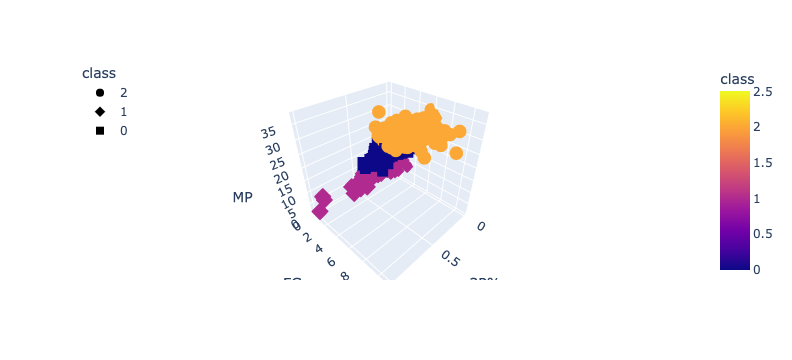

In [63]:
# Now I'm creating the new Model
fig = px.scatter_3d(
    three_clusters,
    x="3P%",
    y="FG",
    z="MP",
    color="class",
    symbol="class",
    width=1000,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()